## Les imports

### Charger la lib popup

In [6]:
#pour colab, sinon changer le chemin "/content" ou supprimer ce test
import os
if os.path.exists("/content"):
    !git init
    !git pull https://github.com/vincentvigon/RECHERCHE3.git
    %ls
else:
    print("on n'est pas sur colab")

import popup_lib.popup as pop

Reinitialized existing Git repository in /content/.git/
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/vincentvigon/RECHERCHE3
 * branch            HEAD       -> FETCH_HEAD
Updating a749e01..f855024
Fast-forward
 popup_lib/popup.py               | 5 ++++-
 popup_lib/vitrine de popup.ipynb | 2 +-
 2 files changed, 5 insertions(+), 2 deletions(-)
ddqn_lib/  GCN.zip       model_1.h5     Pinns/        transformer/
Euler/     Hamilton/     model_2.h5     popup_lib/
GCN/       Hamilton.zip  model_vNet.h5  sample_data/


### Lib standarts

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from typing import *
import tensorflow as tf

## Un exemple ultra simple

Un agent qui cherche a augmenter la somme de ses deux poids.

### Définissons un agent

In [14]:
class Agent_ultra_toy(pop.Abstract_Agent):

    def __init__(self):
        self.wei0=np.array([0.])
        self.wei1=np.array([0.])
        self.famparams={"add0":0,"add1":0}

    #Abstract_Agent: obligatoire
    def get_famparams(self):
        return self.famparams

    #Abstract_Agent: obligatoire
    def set_and_perturb_famparams(self,famparams,period_count):
        self.famparams=famparams

        self.famparams["add0"]+=np.random.choice([+1,-1])
        self.famparams["add1"]+=np.random.choice([+1,-1])


    def score(self)-> float:
        return self.wei0[0] + self.wei1[0]


    #Abstract_Agent: obligatoire
    def optimize_and_return_score(self) -> float:
        #c'est pas vraiment une optimization ici
        self.wei0 +=self.famparams["add0"]
        self.wei1 +=self.famparams["add1"]
        return self.score()

    #Abstract_Agent: obligatoire
    def set_weights(self, weights):
        self.wei0,self.wei1=weights

    #Abstract_Agent: obligatoire
    def get_copy_of_weights(self):
        return [self.wei0,self.wei1]


    #Abstract_Agent: facultatif: pour ajouter des métriques
    #def to_register_at_period_end(self) ->Dict[str,float]:
    #je ne l'ai pas implémenter pour cet agent


    #Abstract_Agent: facultatif: pour observer les poids
    def to_register_at_period_end(self) ->Dict[str,float]:
        return {"wei0":self.wei0[0],"wei1":self.wei1[0]}


### Entrainons une famille d'agent

In [15]:
agents=[Agent_ultra_toy(), Agent_ultra_toy()]
family_trainer=pop.Family_trainer(agents,period_duration="10 steps",nb_strong=1)

for _ in range(20):
    family_trainer.period()


fam_3,échauffement a↗0.0b↗0.0
fam_3,period:1 ----------, mutations:a⇇b|
fam_3,period:2 ----------, mutations:a⇇b⇇b|
fam_3,period:3 ----------
/!\ L'agent:a est décadent pour la 0-ième fois consécutive; record:0.0, scores courants:deque([-6.0, -8.0, -10.0], maxlen=3), best_famparams: {'add0': 0, 'add1': 0} 
, mutations:a⇇b⇇b⇇b|a⇇b⇇b⇇b↫a|
fam_3,period:4 a↗2.0-a↗4.0-a↗6.0-a↗8.0-a↗10.0-, mutations:b⇇a|
fam_3,period:5 a↗12.0b↗14.0a↗14.0b↗18.0a↗16.0b↗22.0a↗18.0b↗26.0a↗20.0b↗30.0, mutations:a⇇b⇇b⇇b↫a⇇b|
fam_3,period:6 a↗32.0b↗34.0a↗34.0b↗38.0a↗36.0b↗42.0a↗38.0b↗46.0a↗40.0b↗50.0, mutations:a⇇b⇇b⇇b↫a⇇b⇇b|
fam_3,period:7 a↗54.0b↗54.0a↗58.0b↗58.0a↗62.0b↗62.0a↗66.0b↗66.0a↗70.0b↗70.0, mutations:a⇇b⇇b⇇b↫a⇇b⇇b⇇b|
fam_3,period:8 a↗76.0b↗74.0a↗82.0b↗78.0a↗88.0b↗82.0a↗94.0b↗86.0a↗100.0b↗90.0, mutations:b⇇a⇇a|
fam_3,period:9 a↗106.0b↗108.0a↗112.0b↗116.0a↗118.0b↗124.0a↗124.0b↗132.0a↗130.0b↗140.0, mutations:a⇇b⇇b⇇b↫a⇇b⇇b⇇b⇇b|
fam_3,period:10 a↗148.0b↗148.0a↗156.0b↗156.0a↗164.0b↗164.0a↗172.0b↗172.0a↗180.0b

### Observons les résultats

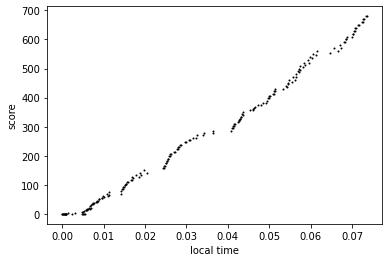

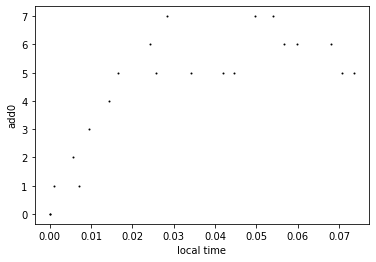

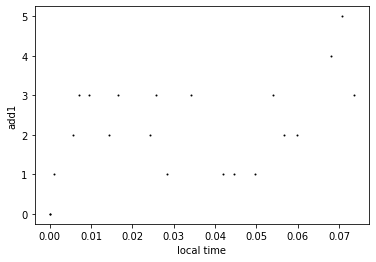

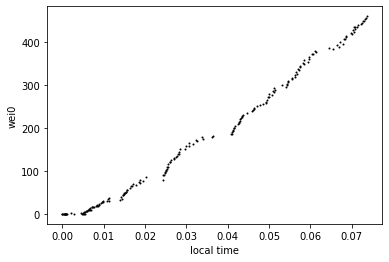

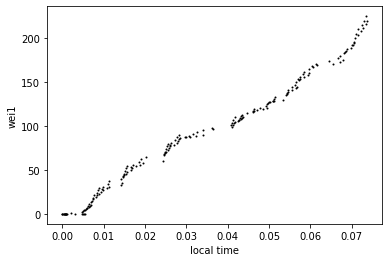

In [10]:
family_trainer.plot_metric("score")
family_trainer.plot_metric("add0")
family_trainer.plot_metric("add1")

family_trainer.plot_metric("wei0")
family_trainer.plot_metric("wei1")

La moyenne des famparam:

In [11]:
print("\nstats_of_best:",family_trainer.stats_of_best())


stats_of_best: {'add0': 5.5, 'add1': 4.5}


### Testons le meilleur agent

In [13]:
best_agent=family_trainer.get_best_agent()
best_agent.return_score()

680.0

Tout c'est passé comme prévu


## Trouver le minimum d'une fonction

### Présentation du problème

On cherche à minimiser la fonction ci-dessous:

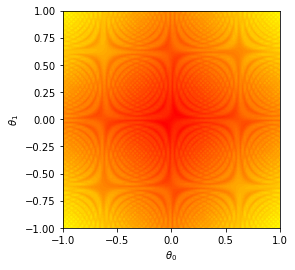

In [16]:
def loss_fn(x:tf.Variable,y:tf.Variable):
    difficulty=0.5 # avec 0.1 l'optimisation devient très facile
    norm1=tf.abs(x)+tf.abs(y)
    return 3*norm1+ difficulty * (1 - tf.sin( x * y * 500))

def plot_loss_func(ax,r):

    x = np.linspace(-r, r, 100,dtype=np.float32)
    y = np.linspace(-r, r, 100,dtype=np.float32)
    xx, yy = np.meshgrid(x, y)
    Q = loss_fn(xx, yy)  ##1.2 - (xx ** 2 + yy ** 2)

    ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.contourf(xx, yy, Q, 50, cmap='autumn')

_,ax=plt.subplots()
plot_loss_func(ax,1)

Elle a comme minimum 0 en (x,y)=(0,0).

On utilise une descente de gradient avec une vitesse différente
pour `x` et pour `y`

En essayant de mettre les paramètres à la main
on trouve pas forcément le minimum car la
fonction à minimiser `loss_fn` a une variabilité locale importante.
Les gradients partent un peu dans tous les sens; mais en moyenne
ils indiquent quand même le bon chemin.

### L'agent

In [25]:
class Minimizer_agent(pop.Abstract_Agent):

    def __init__(self, custom_set_perturb_famparams):
        #on veut pouvoir créer des agents avec des méthodes de perturbation différentes
        Minimizer_agent.set_and_perturb_famparams=custom_set_perturb_famparams
        self.weight0 = tf.Variable(np.random.uniform(-1,1))
        self.weight1 = tf.Variable(np.random.uniform(-1,1))
        self.famparams={"dir0":np.random.uniform(0,1e-1),"dir1":np.random.uniform(0,1e-1)}

    def get_famparams(self):
        return self.famparams

    def set_famparams(self, dico):
        self.famparams=dico



    def set_and_perturb_famparams(self, famparam, period_count: int) -> None:
        raise Exception("to be defined in the constructor")


    def optimize_and_return_score(self):

        with tf.GradientTape() as tape:
            loss=loss_fn(self.weight0,self.weight1)
        gradients=tape.gradient(loss,[self.weight0,self.weight1])

        self.weight0.assign_sub(gradients[0] * self.famparams["dir0"])
        self.weight1.assign_sub(gradients[1] * self.famparams["dir1"])

        return -loss.numpy()


    def set_weights(self, weights):
        self.weight0.assign(weights[0])
        self.weight1.assign(weights[1])

    def get_copy_of_weights(self):
        return [self.weight0.numpy(),self.weight1.numpy()]

    def to_register_on_mutation(self) ->Dict[str, float]:
        return {"wei0":self.weight0.numpy(),"wei1":self.weight1.numpy()}


### L'agent travail seul

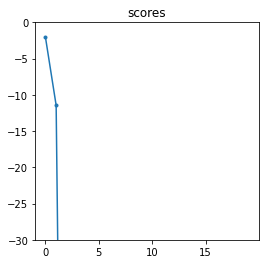

In [26]:
def minimize_by_hand():
    agent=Minimizer_agent(None)
    scores=[]
    weights0=[]
    weights1 = []
    for _ in range(20):
        score=agent.optimize_and_return_score()
        w0,w1=agent.get_copy_of_weights()
        weights0.append(w0)
        weights1.append(w1)
        scores.append(score)

    fig,ax=plt.subplots(1,1,figsize=(4,4))

    ax.set_title("scores")
    ax.set_ylim(-30,0)
    ax.plot(scores,".-")

    plt.show()
minimize_by_hand()

Normalement, c'est un échec (sauf gros coup de bol)

### En famille

Le familyTrainer s'en sort bien (la plupart du temps).

On définit trois familles:
* La famille `quiet` qui bouge tranquillement ses learning rates
* La famille `exited` qui les bouge beaucoup
* La famille `varying` qui bouge de moins en moins


fam_13,échauffement a↗-1.8814b↗-2.752c↗-2.7782d↗-2.8916e↗-1.6283f↗-2.8032g↗-3.1633h↗-6.4396i↗-3.4503j↗-3.4329
fam_14,échauffement a↗-3.8524b↗-1.632c↗-3.6171d↗-1.2909e↗-4.5345f↗-1.3744g↗-4.7495h↗-1.5884i↗-3.8166j↗-2.6327
fam_13,period:1 --------i↗-2.6785-, mutations:j⇇e|
fam_14,period:1 ----------, mutations:i⇇d|
fam_13,period:2 ----------
/!\ L'agent:h est décadent pour la 0-ième fois consécutive; record:-6.4395880699157715, scores courants:deque([-6.439588, -34.069794, -187.20206], maxlen=3), best_famparams: {'dir0': 0.01595179518652472, 'dir1': 0.05238865207159892} 
, mutations:h⇇e|h⇇e↫h|
fam_14,period:2 ----------, mutations:c⇇d|
fam_13,period:3 ----------, mutations:a⇇e|
fam_14,period:3 ----------, mutations:a⇇d|
fam_13,period:4 ----------, mutations:f⇇e|
fam_14,period:4 ----------, mutations:f⇇d|
fam_13,period:5 ----------, mutations:i⇇e|
fam_14,period:5 ----------, mutations:b⇇d|
fam_13,period:6 ----------, mutations:b⇇e|
fam_14,period:6 ----------, mutations:j⇇d|
fam_13,period:

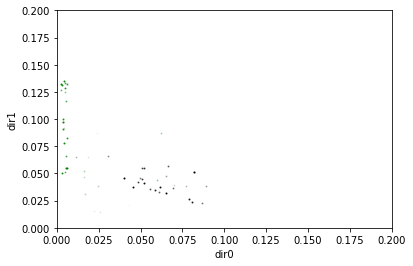

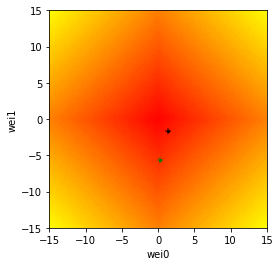

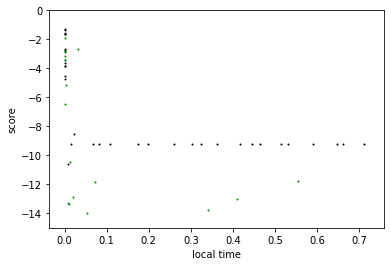

In [29]:
def main():

    def perturb_quiet(agent:Minimizer_agent,famparams,turn_count):
        agent.famparams=famparams
        agent.famparams["dir0"] *= np.random.uniform(0.8, 1.2)
        agent.famparams["dir1"] *= np.random.uniform(0.8, 1.2)

    def perturb_exited(agent: Minimizer_agent,famparams,turn_count):
        agent.famparams=famparams
        agent.famparams["dir0"] *= np.random.uniform(0.5, 1.5)
        agent.famparams["dir1"] *= np.random.uniform(0.5, 1.5)

    popsize = 10
    quiet_agents = [Minimizer_agent(perturb_quiet) for _ in range(popsize)]
    exited_agents = [Minimizer_agent(perturb_exited) for _ in range(popsize)]


    fam_trainers=[
                  pop.Family_trainer(quiet_agents,
                                 period_duration="10 steps",
                                 color="g"
                                 ),
                  pop.Family_trainer(exited_agents,
                                 period_duration="10 steps",
                                 color="k"
                                 )
                  ]
    try:
        for i in range(20):
            for fm in fam_trainers:fm.period()

    except KeyboardInterrupt:
        print("interuption")

    fig,ax=plt.subplots()
    ax.set_ylim(0,0.2)
    ax.set_xlim(0,0.2)
    for fm in fam_trainers:fm.plot_two_metrics("dir0","dir1",ax)


    fig,ax=plt.subplots()
    r=15
    plot_loss_func(ax,r)
    ax.set_ylim(-r, r)
    ax.set_xlim(-r, r)
    for fm in fam_trainers:
        fm.plot_two_metrics("wei0", "wei1",ax)


    fig, ax = plt.subplots()
    ax.set_ylim(-15, 0)
    for fm in fam_trainers:
        fm.plot_metric("score", ax)

    plt.show()

main()

## Un réseau convolutif

### Les data

4431872/4422102 [==============================] - 0s 0us/step


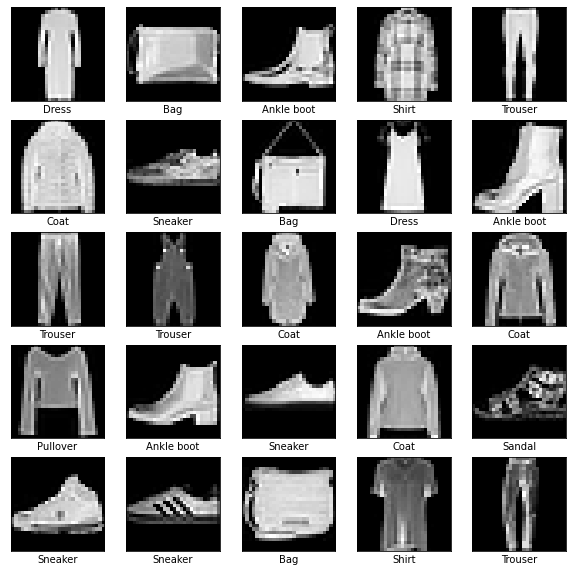

In [30]:
def present_fashion(X,Y):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    plt.figure(figsize=(10, 10))

    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap="gray")
        plt.xlabel(class_names[Y[i]])

    plt.show()

class XY_dealer:

    def __init__(self):
        fashion_mnist = tf.keras.datasets.fashion_mnist
        (X_train, Y_train), (X_val_test, Y_val_test) = fashion_mnist.load_data()
        X_train = X_train / 255.0
        X_val_test = X_val_test / 255.0

        nb_val=5000
        self.X_val=X_val_test[:nb_val]
        self.Y_val=Y_val_test[:nb_val]

        self.X_test=X_val_test[nb_val:]
        self.Y_test=Y_val_test[nb_val:]

        self.X_train=X_train
        self.Y_train=Y_train

        self.shuffle()


    def get_XY_val(self):
        perm=np.random.permutation(len(self.X_val))
        return self.X_val[perm[:400]],self.Y_val[perm[:400]]


    def shuffle(self):
        #print("new epoch")
        perm=np.random.permutation(len(self.X_train))

        self.X_train_shuffle=self.X_train[perm]
        self.Y_train_shuffle=self.Y_train[perm]
        self.batch_count=0

    def get_XY_train(self,batch_size):
        i=self.batch_count
        self.batch_count+=1

        if (i+1)*batch_size>=len(self.X_train):
            self.shuffle()

        X_batch=self.X_train_shuffle[i*batch_size:(i+1)*batch_size]
        Y_batch = self.Y_train_shuffle[i * batch_size:(i + 1) * batch_size]

        return X_batch,Y_batch



XY_DEALER=XY_dealer()
X,Y=XY_DEALER.get_XY_train(25)
present_fashion(X,Y)

### L'agent


In [32]:
class Agent_convo(pop.Abstract_Agent):

    def __init__(self,xy_dealer,lr,batch_size,conv_struc,dense_struc):

        self.batch_size=batch_size
        self.famparams = {"lr": lr}
        self.conv_struc=conv_struc
        self.dense_struc=dense_struc

        self.model= self.make_model()
        self.xy_dealer = xy_dealer
        self._count = -1

        self.make_optimizer()

    #obligatoire
    def get_famparams(self):
        return self.famparams

    #obligatoire
    def make_optimizer(self):
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.famparams["lr"])

    #obligatoire    
    def set_and_perturb_famparams(self,famparams,period_count):
        self.famparams["lr"]=famparams["lr"]*np.random.uniform(0.5,5)
        self.make_optimizer()

    def make_model(self):
        inputs=tf.keras.layers.Input([28,28,1])

        current=inputs
        for nb_units in self.conv_struc:
            current=tf.keras.layers.Conv2D(nb_units,3)(current)

        current=tf.keras.layers.Flatten()(current)
        for nb_units in self.dense_struc:
            current=tf.keras.layers.Dense(nb_units,activation="softmax")(current)

        probas=tf.keras.layers.Dense(10,activation="softmax")(current)

        return tf.keras.Model(inputs=inputs,outputs=probas)

    #obligatoire
    def optimize_and_return_score(self) -> float:
        self._count+=1

        X,Y=self.xy_dealer.get_XY_train(self.batch_size)

        with tf.GradientTape() as tape:
            Y_pred=self.model(X)
            loss=tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(Y, Y_pred))

        gradients=tape.gradient(loss,self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients,self.model.trainable_variables))

        X, Y = self.xy_dealer.get_XY_val()
        Y_pred = self.model(X)
        accuracy = tf.keras.metrics.sparse_categorical_accuracy(Y, Y_pred)
        return accuracy.numpy().mean()

    #obligatoire
    def set_weights(self, weights:List):
        self.model.set_weights(weights)

    #obligatoire
    def get_copy_of_weights(self) -> List:
        return self.model.get_weights()
        #res=[]
        #for tensor in self.model.get_weights():
        #    res.append(tensor) #get_weights tenvoie déjà des copies numpy
        #return res


### Création des familles

Maintenant on a des vraies grosses données.
L'appelle d'un `optimize_and_return_score` prend du temps.
Notre but est de comparer 2 architectures
de réseau de neurone: un lourd et un léger. On va définir la
durée des périod en nombre de seconde pour que les deux
familles s'entrainent autant de temps chacune.

In [33]:
def rand_lr():
    return 10**np.random.uniform(-4,-2)

popsize = 5
agents_light=[Agent_convo(XY_DEALER,rand_lr(),64,conv_struc=(10,20,10),dense_struc=(50,)) for _ in range(popsize)]
agents_heavy=[Agent_convo(XY_DEALER,rand_lr(),64,conv_struc=(32,64,32),dense_struc=(512,)) for _ in range(popsize)]

family_trainers = [
    pop.Family_trainer(agents_light, period_duration="10 seconds",name="light",color="g"),
    pop.Family_trainer(agents_heavy, period_duration="10 seconds",name="heavy",color="r")
]


### Entrainement

In [34]:
try:
    for _ in range(10):
        for fm in family_trainers:
            fm.period()
except KeyboardInterrupt:
    for family_trainer in family_trainers:
        #pour pouvoir reprendre si on veut
        family_trainer.interupt_period()
    print("interuption manuelle")


light,échauffement a↗0.1075b↗0.1625c↗0.13d↗0.16e↗0.1275
heavy,échauffement a↗0.2275b↗0.185c↗0.1075d↗0.08e↗0.11
light,period:1 --c↗0.14-----d↗0.18e↗0.13--c↗0.175-e↗0.145--c↗0.2075d↗0.1825-a↗0.125-c↗0.215d↗0.21-a↗0.155-c↗0.2275--a↗0.1675--d↗0.23-a↗0.2025-c↗0.2425d↗0.2325-a↗0.225b↗0.1675c↗0.28d↗0.24--b↗0.2475-d↗0.2575e↗0.155-b↗0.2525c↗0.3125d↗0.305e↗0.2325a↗0.29--d↗0.325e↗0.25a↗0.3425---e↗0.2825a↗0.3975b↗0.2575-d↗0.345e↗0.3675a↗0.4075b↗0.27-d↗0.375-a↗0.4425b↗0.355c↗0.34-e↗0.3775a↗0.4625b↗0.4025c↗0.3525-e↗0.39-b↗0.4325-d↗0.385-a↗0.465-c↗0.4125--a↗0.495b↗0.445c↗0.48--a↗0.5275b↗0.4525c↗0.495----c↗0.57d↗0.3925-a↗0.5375-c↗0.575-----d↗0.43-a↗0.5725--d↗0.435e↗0.41a↗0.5775--d↗0.46---------------e↗0.44---d↗0.4725e↗0.4475-----a↗0.6--d↗0.475----d↗0.49----d↗0.525e↗0.47-----a↗0.6475----------------------------------a↗0.665------c↗0.585---b↗0.4725----b↗0.475---------b↗0.485--------------b↗0.505---------b↗0.5075-------------------b↗0.5425---------b↗0.5675-d↗0.57-------------------d↗0.6125--------------

### Courbes d'entrainements

L'agent léger s'en sort généralement mieux (surtout sur CPU).


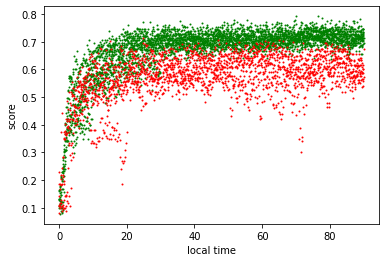

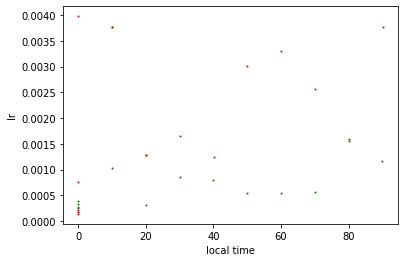

In [35]:
fig,ax=plt.subplots()
for fm in family_trainers:
    fm.plot_metric("score",ax)

_,ax=plt.subplots()
for fm in family_trainers:
    fm.plot_metric("lr",ax)

plt.show()

### Observons le meilleurs agent de chaque famille

In [36]:
best_agents=[fm.get_best_agent() for fm in family_trainers]

for agent in best_agents:
    Y_pred=agent.model(XY_DEALER.X_test)
    accuracy = tf.keras.metrics.sparse_categorical_accuracy(XY_DEALER.Y_test, Y_pred)
    print(accuracy.numpy().mean())

0.7104
0.6302
